## A Quick ETL (Extract - Tranform - Load) Process to Showcase Python's Pandas library
### Source Data: Zillow's Median Home Value with Time Series
### ETL process:
### 1- clean up data, remove unused columns, rename columns
### 2 - filter out data to obtain only Austin-RoundRock metro area
### 3 - calculate YoY value change in percentage format
### 3.5 - calculate median home value each year
### 4 - export data to csv for loading into database or analytical process
### 5 - bonus: we can build visualization here in Python to quickly see trends and projections

In [1]:
# input dependencies
import pandas as pd
import numpy as np

In [2]:
# original Zillow data set
inputFile = "data-source/Zip_Zhvi_SingleFamilyResidence.csv"

csv_reader = pd.read_csv(inputFile, encoding='latin-1')

df = pd.DataFrame(csv_reader)
df.rename(index=str, columns={'RegionName' : 'Zip'}, inplace = True)
df.head()

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,336500.0,...,1038600,1041400,1042100,1041900,1043600,1047000,1048600,1046800,1046500,1051600
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,332600,334500,335900,337100,338400,338400,336900,336000,335900,335100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,503100.0,...,1321000,1324800,1322600,1319900,1319400,1318400,1317200,1318000,1320700,1327000
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,77300.0,...,121300,122200,123000,123600,124500,125700,126300,126800,127500,128200
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,95800.0,...,176400,176800,176900,177400,178000,178600,179400,180200,180900,181700


In [3]:
# clean up unused columns
df.drop(columns=['RegionID'], inplace = True)

In [4]:
df = df.loc[df['Metro'] == 'Austin-Round Rock']
df.head()

,Zip,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
11,78660,Pflugerville,TX,Austin-Round Rock,Travis County,12,138900.0,138600.0,138400.0,138500.0,...,243800,244200,244900,245800,246500,246800,247300,248500,249600,250100
27,78613,Cedar Park,TX,Austin-Round Rock,Williamson County,28,169600.0,169000.0,168600.0,168500.0,...,297400,297100,297100,297100,297200,297800,299300,301500,304400,306500
57,78704,Austin,TX,Austin-Round Rock,Travis County,58,221300.0,221100.0,221000.0,221000.0,...,560000,563600,567800,572400,577800,580500,585700,594200,598800,597700
73,78666,San Marcos,TX,Austin-Round Rock,Hays County,74,103100.0,103000.0,103000.0,103000.0,...,207400,208800,210400,211700,211800,211900,211600,211200,211100,211700
77,78745,Austin,TX,Austin-Round Rock,Travis County,78,135000.0,134200.0,133800.0,133800.0,...,295800,297500,299300,300900,302900,305600,308700,312300,315600,317500


In [5]:
def avgHomeValue (list):
    return round(sum(list)/len(list),2)

df1 = pd.DataFrame()

df1['Zip'] = df['Zip']
df1['City'] = df['City']
df1['County'] = df['CountyName']

# calculate yearly average of home value
monthList = []
for i in range (1997, 2019):
    for j in range (1,13):
        if j<10:
            monthList.append(df[str(i) + '-0' + str(j)])
        else:
            monthList.append(df[str(i) + '-' + str(j)])
        j += 1
    df1[str(i)] = avgHomeValue(monthList)

# reset index
df1 = df1.reset_index(drop=True)
df1.head()

,Zip,City,County,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,78660,Pflugerville,Travis County,141483.33,139600.00,140744.44,142791.67,144410.00,146051.39,146957.14,...,155814.74,156904.76,157618.33,158171.35,158991.18,160262.04,162161.40,164802.08,168074.60,171582.20
1,78613,Cedar Park,Williamson County,181858.33,193845.83,194769.44,194412.50,194943.33,194497.22,193190.48,...,194796.79,195259.52,195445.56,195969.79,196883.33,198931.02,201714.47,205196.67,209292.46,213334.47
2,78704,Austin,Travis County,252041.67,256187.50,252577.78,265137.50,275136.67,279644.44,280761.90,...,311919.23,315507.14,318271.67,321511.46,326042.65,332040.74,339011.40,346353.33,354837.30,364645.08
3,78666,San Marcos,Hays County,107141.67,107900.00,110141.67,111727.08,113126.67,114354.17,115333.33,...,126242.31,127363.10,128191.11,128933.33,129745.59,130875.00,132717.54,135095.83,137882.94,141091.67
4,78745,Austin,Travis County,134350.00,135204.17,134227.78,136093.75,138403.33,139840.28,140601.19,...,149796.15,151641.07,152919.44,154154.69,156040.69,158470.37,162034.65,166754.58,172346.03,178213.64


In [6]:
# function calculating year over year value change in percentage, level of detail to 1 digit after dicimal point
def pctChange (x, y):
    return round((x-y)/y*100, 1)

df2 = pd.DataFrame()

df2['Zip'] = df['Zip']
df2['City'] = df['City']
df2['County'] = df['CountyName']

# calculating each year's percentage of change
for i in range(1996, 2018):
    j = i+1
    currentMon = str(j) + '-12'
    lastMon = str(i) + '-12' 
    df2[str(j)] = pctChange(df[currentMon], df[lastMon])
    i += 1

# reset index
df2 = df2.reset_index(drop=True)
df2.head()

,Zip,City,County,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,78660,Pflugerville,Travis County,0.5,-2.5,8.0,1.1,2.3,0.5,-0.7,...,-1.6,0.5,-3.5,2.1,4.2,6.8,8.7,9.9,6.7,4.3
1,78613,Cedar Park,Williamson County,12.9,7.6,-7.1,1.1,-0.4,-0.7,-10.6,...,-1.3,-2.0,-0.1,5.2,3.8,13.0,5.1,9.9,4.5,2.9
2,78704,Austin,Travis County,19.1,-10.5,11.0,20.2,-3.9,-5.7,-4.4,...,-1.9,-0.5,0.6,5.8,8.8,8.7,5.1,4.7,8.6,11.2
3,78666,San Marcos,Hays County,3.7,2.5,4.5,1.6,1.2,2.7,0.2,...,-2.0,2.4,-5.1,6.0,-1.0,10.9,9.1,9.9,4.2,6.9
4,78745,Austin,Travis County,-3.3,3.5,-0.6,6.4,3.8,-3.4,0.3,...,-0.3,2.7,-3.7,3.7,10.7,5.4,17.5,11.9,7.3,8.9


In [7]:
# export result to output csv file
output1 = 'zillow-median-home-value-YoY.csv'
output2 = 'zillow-yoy-price-change-Percent.csv'
df1.to_csv(output1, index=True)
df2.to_csv(output2, index=True)

In [8]:
# still a working progress, further data transformation is needed.

import matplotlib.pyplot as plt

df2 = df1.T

df2.reset_index()

xlim = df2.iloc[:,1]
xlim = list(xlim)
xlim = xlim[3:]
xlim


[181858.33,
 193845.83,
 194769.44,
 194412.5,
 194943.33,
 194497.22,
 193190.48,
 191854.17,
 191402.78,
 191850.83,
 192943.18,
 194039.58,
 194796.79,
 195259.52,
 195445.56,
 195969.79,
 196883.33,
 198931.02,
 201714.47,
 205196.67,
 209292.46,
 213334.47]

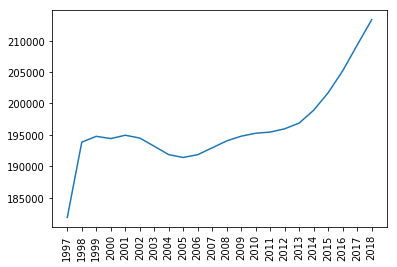

In [9]:
ylim = df2.index.values
ylim = list(ylim[3:])
ylim

plt.plot(ylim, xlim)
plt.xticks(rotation='vertical')
plt.show()